<a href="https://colab.research.google.com/github/Statistically-Inclined/NLP-Tutorial/blob/main/FakeNews_Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake['Label'] = 1
df_true['Label'] = 0

In [ ]:
df_fake.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
df_true.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
print(df_fake.shape, df_true.shape)

(23481, 5) (21417, 5)


In [ ]:
df = df_true.append(df_fake)

In [ ]:
df.shape

(44898, 5)

In [ ]:
df.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
df.tail()

,title,text,subject,date,Label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [ ]:
df.reset_index(inplace=True)
df.tail()

,index,title,text,subject,date,Label
44893,23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
44897,23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [ ]:
df.drop('index', axis=1, inplace=True)
df.tail()

,title,text,subject,date,Label
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [ ]:
df.shape

(44898, 5)

In [ ]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


### Handling "date" variable

In [ ]:
# Error due to the 'date' variable contains some textual statements
df['date'] = pd.to_datetime(df['date'])

ParserError: ignored

In [ ]:
# As currently 'date' variable is in string format
df['date_len'] = df['date'].apply(len)
df.head()

,title,text,subject,date,Label,date_len
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,18
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,18
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,18
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,18
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,18


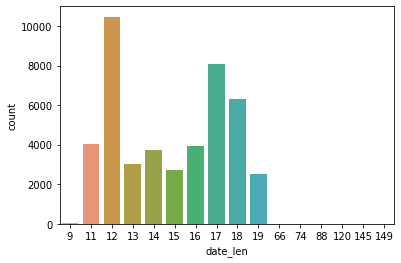

In [ ]:
sns.countplot(df['date_len'])

In [ ]:
# Extracting out the 'date' variable that contains textual statements
df_issue = df[df['date_len'] > 19]
df_issue

,title,text,subject,date,Label,date_len
30775,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,1,145
36924,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,1,88
36925,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,1,149
37256,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1,74
37257,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1,66
38849,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,1,74
38850,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,1,66
40350,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,1,120
43286,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1,74
43287,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1,66


In [ ]:
index_date = df_issue.index.to_list()
index_date

[30775, 36924, 36925, 37256, 37257, 38849, 38850, 40350, 43286, 43287]

In [ ]:
mode = df['date'].mode()[0]
mode

'December 20, 2017 '

In [ ]:
print(df.loc[index_date, 'date'])

30775    https://100percentfedup.com/served-roy-moore-v...
36924    https://100percentfedup.com/video-hillary-aske...
36925    https://100percentfedup.com/12-yr-old-black-co...
37256    https://fedup.wpengine.com/wp-content/uploads/...
37257    https://fedup.wpengine.com/wp-content/uploads/...
38849    https://fedup.wpengine.com/wp-content/uploads/...
38850    https://fedup.wpengine.com/wp-content/uploads/...
40350    MSNBC HOST Rudely Assumes Steel Worker Would N...
43286    https://fedup.wpengine.com/wp-content/uploads/...
43287    https://fedup.wpengine.com/wp-content/uploads/...
Name: date, dtype: object


In [ ]:
# Imputing textual statements with most frequent date
df.loc[index_date, 'date'] = mode

In [ ]:
print(df.loc[index_date, 'date'])

30775    December 20, 2017 
36924    December 20, 2017 
36925    December 20, 2017 
37256    December 20, 2017 
37257    December 20, 2017 
38849    December 20, 2017 
38850    December 20, 2017 
40350    December 20, 2017 
43286    December 20, 2017 
43287    December 20, 2017 
Name: date, dtype: object


In [ ]:
## We can also solve this textual statement problem as this:

# print(df.loc[index_date, 'date'])
# df_issue['date'] = mode
# df = df.append(df_issue)
# df.drop(index_date, axis=0, inplace=True)
# print(df.loc[index_date, 'date'])

In [ ]:
# converting it into a date-time format
df["date"] = pd.to_datetime(df['date'])
df.head()

,title,text,subject,date,Label,date_len
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0,18
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0,18
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0,18
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0,18
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     44898 non-null  object        
 1   text      44898 non-null  object        
 2   subject   44898 non-null  object        
 3   date      44898 non-null  datetime64[ns]
 4   Label     44898 non-null  int64         
 5   date_len  44898 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.1+ MB


In [ ]:
df['day'] = df["date"].dt.day
df['month'] = df["date"].dt.month
df['year'] = df["date"].dt.year

In [ ]:
df.head()

,title,text,subject,date,Label,date_len,day,month,year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0,18,31,12,2017
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0,18,29,12,2017
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0,18,31,12,2017
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0,18,30,12,2017
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0,18,29,12,2017


In [ ]:
df.drop('date', axis=1, inplace=True)
df.head()

,title,text,subject,Label,date_len,day,month,year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,18,31,12,2017
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,18,29,12,2017
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,18,31,12,2017
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,18,30,12,2017
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,18,29,12,2017


In [ ]:
df.drop('date_len', axis=1, inplace=True)
df.head()

,title,text,subject,Label,day,month,year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,31,12,2017
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,29,12,2017
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,31,12,2017
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,30,12,2017
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,29,12,2017


[]

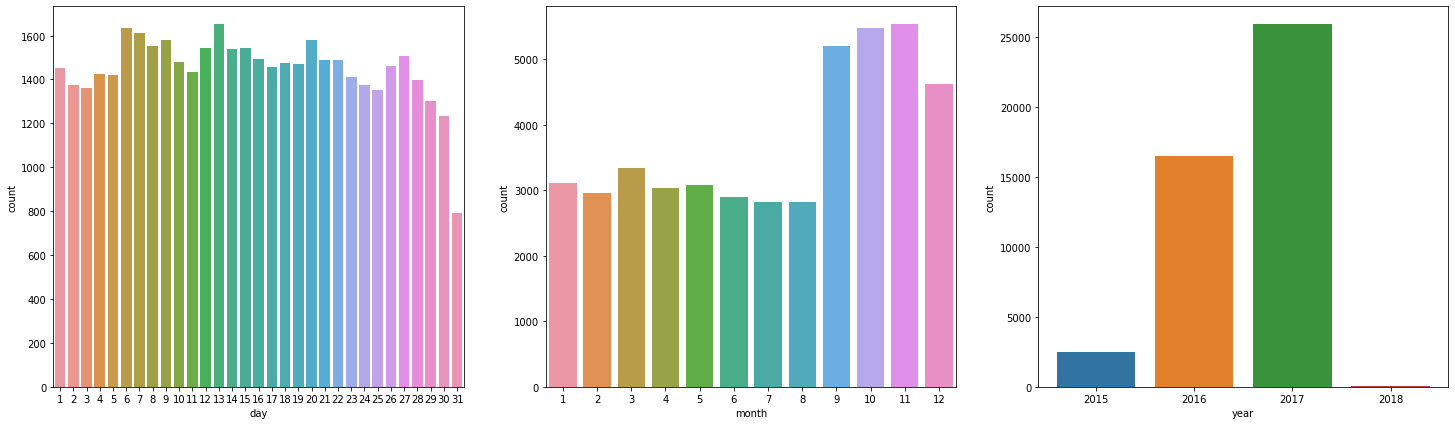

In [ ]:
plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
sns.countplot(df['day'])
plt.subplot(1,3,2)
sns.countplot(df['month'])
plt.subplot(1,3,3)
sns.countplot(df['year'])
plt.plot()

In [ ]:
df.head()

,title,text,subject,Label,day,month,year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,31,12,2017
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,29,12,2017
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,31,12,2017
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,30,12,2017
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,29,12,2017


In [ ]:
df.tail()

,title,text,subject,Label,day,month,year
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1,16,1,2016
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1,16,1,2016
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1,15,1,2016
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1,14,1,2016
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,1,12,1,2016


[]

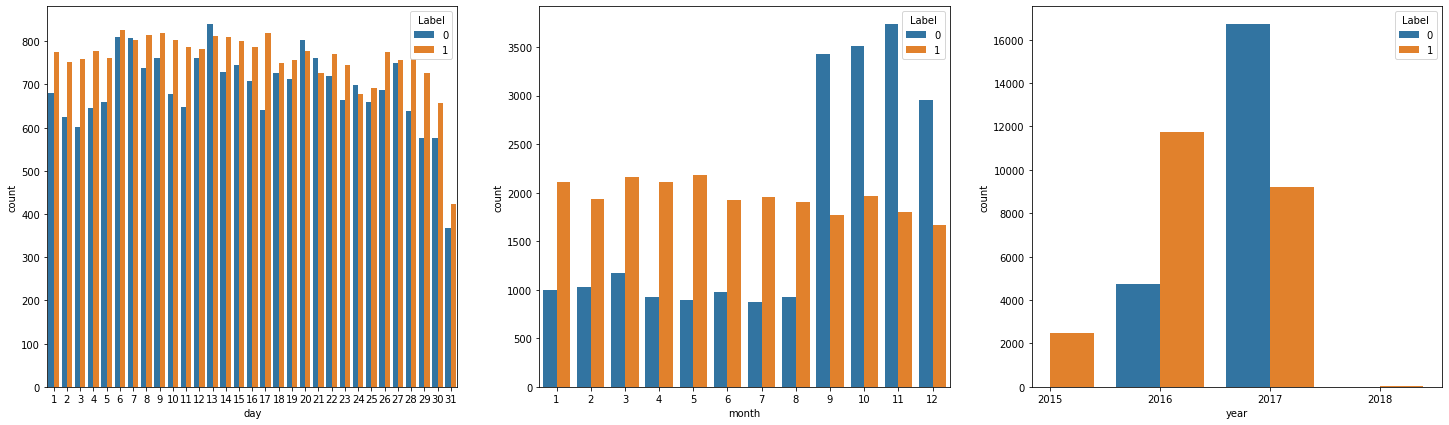

In [ ]:
plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
sns.countplot(df['day'], hue=df['Label'])
plt.subplot(1,3,2)
sns.countplot(df['month'], hue=df['Label'])
plt.subplot(1,3,3)
sns.countplot(df['year'], hue=df['Label'])
plt.plot()

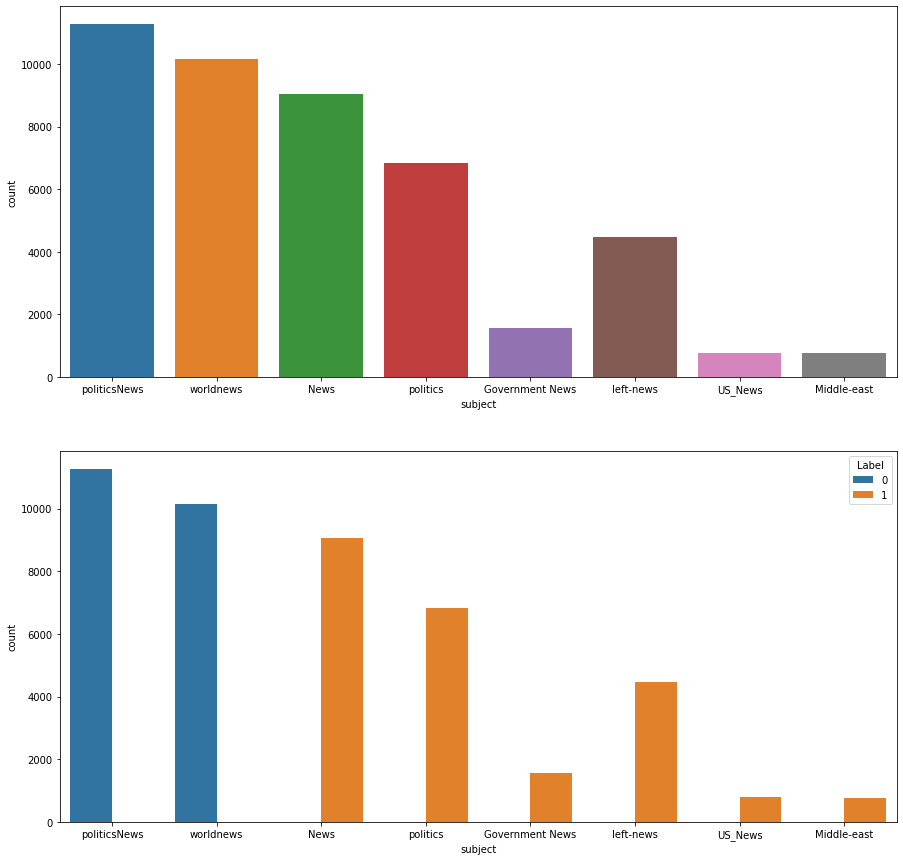

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.countplot(df['subject'])
plt.subplot(2,1,2)
sns.countplot(df['subject'], hue=df['Label'])

In [ ]:
print(df[df['subject']=='News']['Label'].unique())
print(df[df['subject']=='News']['Label'].nunique())

[1]
1


In [ ]:
df.head()

,title,text,subject,Label,day,month,year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,31,12,2017
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,29,12,2017
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,31,12,2017
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,30,12,2017
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,29,12,2017


In [ ]:
X = df.drop(['Label'], axis=1)
y = df['Label']

In [ ]:
X.head()

,title,text,subject,day,month,year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31,12,2017
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29,12,2017
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31,12,2017
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30,12,2017
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29,12,2017


In [ ]:
X.shape

(44898, 6)

In [ ]:
y.shape

(44898,)

In [ ]:
y.value_counts()

1    23481
0    21417
Name: Label, dtype: int64

###LSTM Model Implementation

In [ ]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

In [ ]:
voc_size = 5000

### Text Preprocessing

In [ ]:
message = X.copy()
message.head()

,title,text,subject,day,month,year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31,12,2017
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29,12,2017
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31,12,2017
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30,12,2017
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29,12,2017


In [ ]:
message['title'][1]

'U.S. military to accept transgender recruits on Monday: Pentagon'

In [ ]:
message['title'][2]

"Senior U.S. Republican senator: 'Let Mr. Mueller do his job'"

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
corpus = []
for i in range(0, len(message)):
  review = re.sub('[^a-zA-Z]', ' ', message['title'][i]) # Removing all the characters other than 'a-z' and 'A-Z'
  review = review.lower() # Lowercase the sentence
  review = review.split() # Split the sentence in words
  review = [ ps.stem(word) for word in review if word not in stopwords.words('english') ]  # stemming and stopword removal
  review = ' '.join(review) # Again join all words and make sentence
  corpus.append(review)

In [ ]:
corpus # List of all the processed sentences

['u budget fight loom republican flip fiscal script',
 'u militari accept transgend recruit monday pentagon',
 'senior u republican senat let mr mueller job',
 'fbi russia probe help australian diplomat tip nyt',
 'trump want postal servic charg much amazon shipment',
 'white hous congress prepar talk spend immigr',
 'trump say russia probe fair timelin unclear nyt',
 'factbox trump twitter dec approv rate amazon',
 'trump twitter dec global warm',
 'alabama offici certifi senat elect jone today despit challeng cnn',
 'jone certifi u senat winner despit moor challeng',
 'new york governor question constitution feder tax overhaul',
 'factbox trump twitter dec vaniti fair hillari clinton',
 'trump twitter dec trump iraq syria',
 'man say deliv manur mnuchin protest new u tax law',
 'virginia offici postpon lotteri draw decid tie statehous elect',
 'u lawmak question businessman trump tower meet sourc',
 'trump twitter dec hillari clinton tax cut bill',
 'u appeal court reject challeng tr

### OneHot Representation

In [ ]:
onehot_repr = [one_hot(word, voc_size)for word in corpus]

In [ ]:
onehot_repr # Index value assigned (<5000) to each word of corpus

[[4697, 3487, 4712, 1753, 4536, 1340, 2303, 2423],
 [4697, 396, 3596, 3426, 3972, 2546, 4133],
 [3513, 4697, 4536, 2922, 448, 4116, 3840, 1972],
 [598, 1214, 4459, 2959, 4203, 3844, 2811, 4912],
 [1906, 2544, 4813, 4358, 1719, 4752, 770, 4865],
 [3497, 2801, 277, 3333, 1213, 4419, 2438],
 [1906, 2968, 1214, 4459, 887, 3730, 1751, 4912],
 [2329, 1906, 2800, 4986, 2148, 1095, 770],
 [1906, 2800, 4986, 2802, 3404],
 [2247, 4240, 865, 2922, 1243, 1781, 1099, 2271, 1330, 1326],
 [1781, 865, 4697, 2922, 671, 2271, 2834, 1330],
 [1912, 1923, 460, 1288, 3810, 689, 2086, 533],
 [2329, 1906, 2800, 4986, 357, 887, 3541, 2622],
 [1906, 2800, 4986, 1906, 2436, 2493],
 [1450, 2968, 1845, 735, 702, 504, 1912, 4697, 2086, 42],
 [4694, 4240, 1099, 3208, 4306, 3689, 1864, 1752, 1243],
 [4697, 728, 1288, 2791, 1906, 211, 3091, 3565],
 [1906, 2800, 4986, 3541, 2622, 2086, 1720, 2382],
 [4697, 956, 3390, 1140, 1330, 1906, 909, 4574, 217],
 [34, 3123, 702, 2711, 3705, 2547, 4674, 3597, 735, 1038],
 [689, 32

In [ ]:
onehot_repr[1]

[4697, 396, 3596, 3426, 3972, 2546, 4133]

### Embedding Reprsentation

In [ ]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)

In [ ]:
embedded_docs # Adding zeroes in the beginning of the onehot_repr values for balancing all the sentences length to 20

array([[   0,    0,    0, ..., 1340, 2303, 2423],
       [   0,    0,    0, ..., 3972, 2546, 4133],
       [   0,    0,    0, ..., 4116, 3840, 1972],
       ...,
       [   0,    0,    0, ..., 2624,  252, 2493],
       [   0,    0,    0, ..., 3076,  936, 2639],
       [   0,    0,    0, ...,  325, 2974, 3134]], dtype=int32)

In [ ]:
embedded_docs[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 4697,  396, 3596, 3426, 3972, 2546, 4133], dtype=int32)

### Model Building for LSTM

In [ ]:
embedding_vector_features = 40 # 40 features i.e, the sentence length is 20, &  we are converting it into 40 dimensions/features
model1 = Sequential()
model1.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model1.add(LSTM(100))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss = 'binary_crossentropy',optimizer='adam', metrics='accuracy')
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


### Model Building for Bidirectional LSTM 
### One LSTM is in forward direction and another one is in backward direction

In [ ]:
embedding_vector_features = 40 # 40 features i.e, the sentence length is 20, &  we are converting it into 40 dimensions/features
model2 = Sequential()
model2.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model2.add(Bidirectional(LSTM(100)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss = 'binary_crossentropy',optimizer='adam', metrics='accuracy')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________


### Model Building for Bidirectional LSTM with Dropouts

In [ ]:
embedding_vector_features = 40 # 40 features i.e, the sentence length is 20, &  we are converting it into 40 dimensions/features
model3 = Sequential()
model3.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model3.add(Bidirectional(LSTM(100)))
model3.add(Dropout(0.3))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss = 'binary_crossentropy',optimizer='adam', metrics='accuracy')
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________


### Data Preparation

In [ ]:
len(embedded_docs), y.shape

(44898, (44898,))

In [ ]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [ ]:
X_final.shape, y_final.shape

((44898, 20), (44898,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=1234, stratify=y_final)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35918, 20), (8980, 20), (35918,), (8980,))

### Model-1 Traininga and Evaluation  

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
449/449 [==============================] - 10s 7ms/step - loss: 0.2437 - accuracy: 0.8937 - val_loss: 0.1653 - val_accuracy: 0.9314
Epoch 2/10
449/449 [==============================] - 3s 6ms/step - loss: 0.1238 - accuracy: 0.9527 - val_loss: 0.1536 - val_accuracy: 0.9368
Epoch 3/10
449/449 [==============================] - 3s 6ms/step - loss: 0.0934 - accuracy: 0.9641 - val_loss: 0.1571 - val_accuracy: 0.9376
Epoch 4/10
449/449 [==============================] - 3s 6ms/step - loss: 0.0691 - accuracy: 0.9731 - val_loss: 0.1654 - val_accuracy: 0.9369
Epoch 5/10
449/449 [==============================] - 3s 6ms/step - loss: 0.0517 - accuracy: 0.9805 - val_loss: 0.1938 - val_accuracy: 0.9350
Epoch 6/10
449/449 [==============================] - 3s 6ms/step - loss: 0.0401 - accuracy: 0.9849 - val_loss: 0.2301 - val_accuracy: 0.9379
Epoch 7/10
449/449 [==============================] - 3s 6ms/step - loss: 0.0284 - accuracy: 0.9898 - val_loss: 0.2799 - val_accuracy: 0.9389
Epoch

In [ ]:
model1.save('LSTM_Model-1.h5')

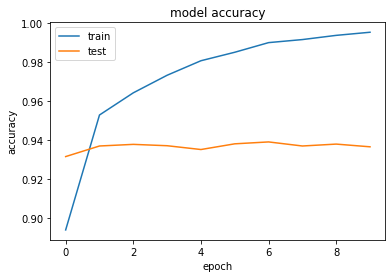

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

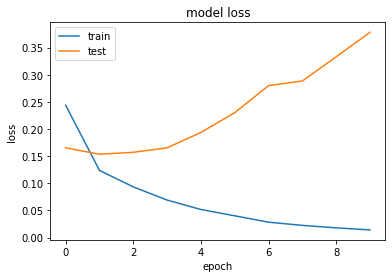

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print('Train accuracy of the First model: ',history1.history['accuracy'][-1])
print('Validation accuracy of the First model: ',history1.history['val_accuracy'][-1])
print('Train loss of the First model: ',history1.history['loss'][-1])
print('Validation loss of the First model: ',history1.history['val_loss'][-1])

Train accuracy of the First model:  0.9951625466346741
Validation accuracy of the First model:  0.9363864064216614
Train loss of the First model:  0.014139659702777863
Validation loss of the First model:  0.3782411217689514


In [ ]:
score = model1.evaluate(X_test, y_test, verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.39438068866729736
Test Accuracy: 0.9342984557151794


In [ ]:
from keras.models import load_model
model1 = load_model('LSTM_Model-1.h5')
y_test_pred = model1.predict(X_test)
y_test_pred

array([[9.8078984e-01],
       [7.2165029e-05],
       [9.0487919e-07],
       ...,
       [8.6446181e-07],
       [1.8338734e-01],
       [9.9636072e-01]], dtype=float32)

In [ ]:
y_test_pred = np.where(y_test_pred > 0.5, 1, 0)
y_test_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
len(y_test_pred)

8980

In [ ]:
y_test_pred = np.reshape(y_test_pred,8980)
y_test_pred

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

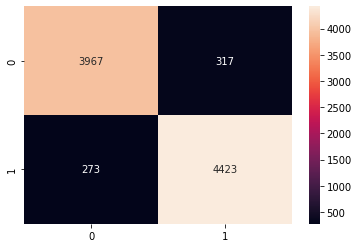

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4284
           1       0.93      0.94      0.94      4696

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [ ]:
print(accuracy_score(y_test, y_test_pred))

0.9342984409799554


### Model-2 Training and Evaluation

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
449/449 [==============================] - 9s 10ms/step - loss: 0.2238 - accuracy: 0.9043 - val_loss: 0.1636 - val_accuracy: 0.9325
Epoch 2/10
449/449 [==============================] - 4s 9ms/step - loss: 0.1209 - accuracy: 0.9517 - val_loss: 0.1507 - val_accuracy: 0.9386
Epoch 3/10
449/449 [==============================] - 4s 9ms/step - loss: 0.0888 - accuracy: 0.9665 - val_loss: 0.1540 - val_accuracy: 0.9369
Epoch 4/10
449/449 [==============================] - 4s 9ms/step - loss: 0.0688 - accuracy: 0.9747 - val_loss: 0.1712 - val_accuracy: 0.9378
Epoch 5/10
449/449 [==============================] - 4s 10ms/step - loss: 0.0563 - accuracy: 0.9789 - val_loss: 0.1893 - val_accuracy: 0.9351
Epoch 6/10
449/449 [==============================] - 6s 12ms/step - loss: 0.0426 - accuracy: 0.9848 - val_loss: 0.2075 - val_accuracy: 0.9358
Epoch 7/10
449/449 [==============================] - 5s 11ms/step - loss: 0.0358 - accuracy: 0.9875 - val_loss: 0.2095 - val_accuracy: 0.9349
Ep

In [ ]:
model2.save('Bidirectional_LSTM_Model-2.h5')

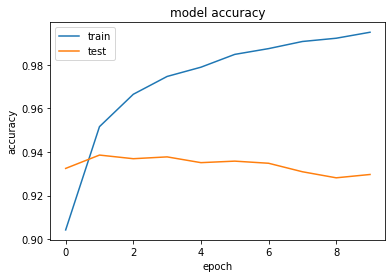

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

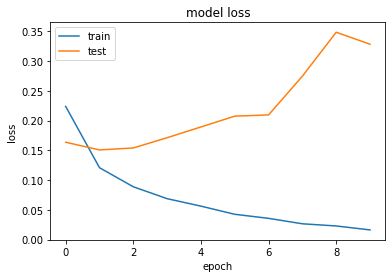

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print('Train accuracy of the First model: ',history2.history['accuracy'][-1])
print('Validation accuracy of the First model: ',history2.history['val_accuracy'][-1])
print('Train loss of the First model: ',history2.history['loss'][-1])
print('Validation loss of the First model: ',history2.history['val_loss'][-1])

Train accuracy of the First model:  0.9949885010719299
Validation accuracy of the First model:  0.9297049045562744
Train loss of the First model:  0.016331588849425316
Validation loss of the First model:  0.328299880027771


In [ ]:
score = model2.evaluate(X_test, y_test, verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.32650062441825867
Test Accuracy: 0.9349665641784668


In [ ]:
from keras.models import load_model
model2 = load_model('Bidirectional_LSTM_Model-2.h5')
y_test_pred = model2.predict(X_test)
y_test_pred

array([[1.7627759e-02],
       [5.7966117e-04],
       [8.3578244e-04],
       ...,
       [1.6148374e-04],
       [3.6949292e-01],
       [9.7289038e-01]], dtype=float32)

In [ ]:
y_test_pred = np.where(y_test_pred > 0.5, 1, 0)
y_test_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
y_test_pred = np.reshape(y_test_pred,len(y_test_pred))
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

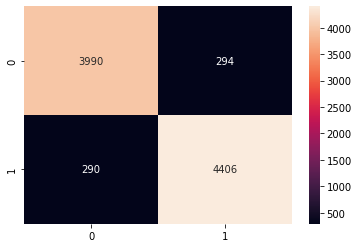

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4284
           1       0.94      0.94      0.94      4696

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [ ]:
print(accuracy_score(y_test, y_test_pred))

0.9349665924276169


### Model-3 Training and Evaluation

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
449/449 [==============================] - 12s 19ms/step - loss: 0.2242 - accuracy: 0.9058 - val_loss: 0.1605 - val_accuracy: 0.9340
Epoch 2/10
449/449 [==============================] - 7s 15ms/step - loss: 0.1233 - accuracy: 0.9528 - val_loss: 0.1512 - val_accuracy: 0.9365
Epoch 3/10
449/449 [==============================] - 5s 12ms/step - loss: 0.0944 - accuracy: 0.9637 - val_loss: 0.1566 - val_accuracy: 0.9361
Epoch 4/10
449/449 [==============================] - 6s 14ms/step - loss: 0.0739 - accuracy: 0.9728 - val_loss: 0.1715 - val_accuracy: 0.9378
Epoch 5/10
449/449 [==============================] - 5s 12ms/step - loss: 0.0570 - accuracy: 0.9795 - val_loss: 0.2260 - val_accuracy: 0.9347
Epoch 6/10
449/449 [==============================] - 4s 9ms/step - loss: 0.0457 - accuracy: 0.9842 - val_loss: 0.2031 - val_accuracy: 0.9354
Epoch 7/10
449/449 [==============================] - 4s 9ms/step - loss: 0.0378 - accuracy: 0.9871 - val_loss: 0.2406 - val_accuracy: 0.9310


In [ ]:
model3.save('Bidirectional_LSTM_Model-3.h5')

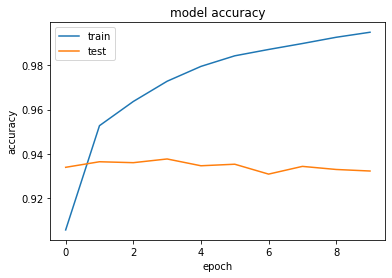

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

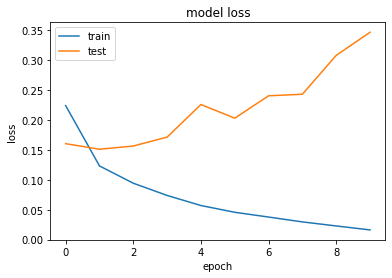

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print('Train accuracy of the First model: ',history3.history['accuracy'][-1])
print('Validation accuracy of the First model: ',history3.history['val_accuracy'][-1])
print('Train loss of the First model: ',history3.history['loss'][-1])
print('Validation loss of the First model: ',history3.history['val_loss'][-1])

Train accuracy of the First model:  0.9948493242263794
Validation accuracy of the First model:  0.932349681854248
Train loss of the First model:  0.01624022237956524
Validation loss of the First model:  0.34690767526626587


In [ ]:
score = model3.evaluate(X_test, y_test, verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.35340437293052673
Test Accuracy: 0.9327394366264343


In [ ]:
from keras.models import load_model
model3 = load_model('Bidirectional_LSTM_Model-3.h5')
y_test_pred = model3.predict(X_test)
y_test_pred

array([[3.9836887e-01],
       [4.9229464e-01],
       [7.8531227e-04],
       ...,
       [5.5968104e-04],
       [8.3488488e-01],
       [9.8768252e-01]], dtype=float32)

In [ ]:
y_test_pred = np.where(y_test_pred > 0.5, 1, 0)
y_test_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
y_test_pred = np.reshape(y_test_pred,len(y_test_pred))
y_test_pred

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

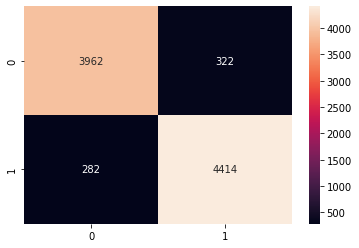

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4284
           1       0.93      0.94      0.94      4696

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [ ]:
print(accuracy_score(y_test, y_test_pred))

0.9327394209354121
